Code for FAHA Chapter 8: Linkages Between Feminist Philosophy and Mainstream Ethics
------------------------------------------------------------------------------------

In this notebook, we present the code used in order to implement the study of the linkages between word groupings in the abstracts of the feminist journal Hypatia and the mainstream analytic ethics journal Ethics.


The first block imports the necessary packages.

In [3]:
#Import beautiful soup and requests for scraping
from bs4 import BeautifulSoup
import requests

#Import numpy for basic python functions.
import numpy as np

#Import the natural language toolkit and some specific vocabularies and functions
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize 

#Import networkx for graph building
import networkx as nx

#Import matplotlib pyplot for making images
import matplotlib.pyplot as plt

The second block defines a list of stopwords, and then scrapes and cleans the abstracts for each year of analysis from both Hypatia and Ethics, generating .txt files for each year of abstracts. It then groups them into a single .txt file for each journal, and extracts the most common words in each corpus. This block can take a few minutes to run, with exact times depending on your machine. 

In [4]:
#Import stop words, and add other specific words, phrases, and punctuation to the stopword list.
all_stopwords = stopwords.words('english')
other_removals = ['shrink', '(', ')', '...', ':', 'article', 'paper', 'chapter', 'book','essay','.',',','``',"'",'argue',';','philosophy','philosophical','``','”','“',"'s",'?','``','’','one','two','three','four','five','six','seven','eight','nine','ten']
all_stopword = np.append(all_stopwords,other_removals)

#Using a for-loop, scrape all relevant years of Hypatia abstracts. Note that '%s' is a variable that inserts each year into the URL to be scraped.
for i in range(1986,2015):
    URL = "https://philpapers.org/pub/404/%s"
    year = str(i)
    URL = URL %year
    r = requests.get(URL)
    soup = BeautifulSoup(r.text, "html.parser")

    abstracts = soup.find_all("div", class_='abstract')
    abstracts = np.array(abstracts, dtype=object).reshape(-1,1)
    
    #Remove all stopwords from each absract in a a given year.
    
    for i in range(0,len(abstracts)):
        abstracts[i][0] = BeautifulSoup(str(abstracts[i][0]), "lxml").text
        abstracts[i][0] = word_tokenize(str(abstracts[i][0]))
        abstracts[i][0] = [word for word in abstracts[i][0] if not word.lower() in all_stopwords]
        abstracts[i][0] = (" ").join(abstracts[i][0])
    
    #Save each years abstracts as a separate file, with HTML tags cleaned out. 
    filename = "Hypatia" + year + ".txt"

    np.savetxt(filename,abstracts,fmt='%s')
    with open(filename) as f:
        html_cleaned_abstracts = BeautifulSoup(f, "lxml").text
    with open(filename, 'w') as output_file:
        output_file.write(html_cleaned_abstracts)
        
#Repeat process above for all relevant years of Ethics abstracts.
for i in range(1992,2021):
    URL = "https://philpapers.org/pub/325/%s"
    year = str(i)
    URL = URL %year
    r = requests.get(URL)
    soup = BeautifulSoup(r.text, "html.parser")

    abstracts = soup.find_all("div", class_='abstract')
    abstracts = np.array(abstracts, dtype=object).reshape(-1,1)
    
    for i in range(0,len(abstracts)):
        abstracts[i][0] = BeautifulSoup(str(abstracts[i][0]), "lxml").text
        abstracts[i][0] = word_tokenize(str(abstracts[i][0]))
        abstracts[i][0] = [word for word in abstracts[i][0] if not word.lower() in all_stopwords]
        abstracts[i][0] = (" ").join(abstracts[i][0])
    
    filename = "Ethics" + year + ".txt"

    np.savetxt(filename,abstracts,fmt='%s')
    with open(filename) as f:
        html_cleaned_abstracts = BeautifulSoup(f, "lxml").text
    with open(filename, 'w') as output_file:
        output_file.write(html_cleaned_abstracts)
        
#Combine all Hypatia abstracts into a single file.
all_hypatia = ["Hypatia" + str(i) + ".txt" for i in range(1986,2015)]

with open('All_Hypatia.txt', "w") as outfile:
    for filename in all_hypatia:
        with open(filename) as infile:
            contents = infile.read()
            outfile.write(contents)
            
#Combine all Ethics abstracts into a single file.           
all_ethics = ["Ethics" + str(i) + ".txt" for i in range(1992,2021)]

with open('All_Ethics.txt', "w") as outfile:
    for filename in all_ethics:
        with open(filename) as infile:
            contents = infile.read()
            outfile.write(contents)
            
#Open the file containing all Ethics abstracts and read it into a NumPy array. 
all_ethics = open('All_Ethics.txt', 'r').read()

#Using the natural language toolkit tokenize function, identify each token word in the corpus of abstracts
all_ethics = nltk.tokenize.word_tokenize(all_ethics)

#Assign each token word in the corpus a count.
all_ethics_dist = nltk.FreqDist(w.lower() for w in all_ethics)

#Extract the 100 most frequent words in the Ethics corpus.
ethics_most_common = all_ethics_dist.most_common(100)

#Remove the counts from each word
ethics_most_common = [ethics_most_common[i][0] for i in range(0,100)]

#Save the list of the 100 most common words as a .txt file
np.savetxt('ethics_most_common.txt',ethics_most_common,fmt='%s')

#Repeat the process above for the Hypatia corpus
all_hypatia = open('All_Hypatia.txt', 'r').read()
all_hypatia = nltk.tokenize.word_tokenize(all_hypatia)
all_hypatia_dist = nltk.FreqDist(w.lower() for w in all_hypatia)
hypatia_most_common = all_hypatia_dist.most_common(100)
hypatia_most_common = [hypatia_most_common[i][0] for i in range(0,100)]

#In the next step, which is not done above for the Ethics corpus, we remove those words from the list
#of top 100 Hypatia words that are already in the top 100 Ethics words.
hypatia_most_common = [x for x in hypatia_most_common if x not in ethics_most_common]

#Save the list of the remaining most common words as a .txt file
np.savetxt('hypatia_most_common.txt',hypatia_most_common,fmt='%s')

At this point, we manually inspect both lists of words, and group them into categories using domain expertise. The next block defines these groupings.

In [5]:
#Create arrays of words for each of the groupings of common words in the ethics corpus.
ethics_morality_terms = ['moral', 'ethics', 'value', 'good', 'right', 'wrong', 'morally', 'ethical', 'person', 'responsibility', 'morality']
ethics_politics_terms = ['political', 'people', 'action', 'social', 'freedom', 'war', 'justice', 'equality', 'law', 'status']
ethics_rationality_terms = ['reasons', 'argument', 'reason', 'argues', 'principle', 'arguments', 'rational', 'principles', 'thought', 'question', 'reasoning', 'plausible', 'rationality', 'judgments']
ethics_philosophy_terms = ['theory', 'view', 'theories', 'work', 'claim', 'views', 'philosophers', 'kind', 'cases', 'claims', 'conception', 'sense', 'defend', 'according', 'problem', 'problems', 'terms']
ethics_normative_terms = ['normative', 'ought', 'must', 'might', 'virtue', 'practical']
ethics_decision_theoretic_terms = ['agent', 'act', 'choice', 'actions', 'agency']
ethics_naturalistic_terms = ['nature', 'human', 'life']
ethics_historical_figures = ['Rawls']

#Create an array with each of the word-groupings as an entry.
ethics_categories = [ethics_morality_terms,ethics_politics_terms,ethics_rationality_terms,ethics_philosophy_terms,ethics_normative_terms,\
                    ethics_decision_theoretic_terms,ethics_naturalistic_terms,ethics_historical_figures]


#Repeat the same process for the common words in the Hypatia corpus
hypatia_core_feminist_terms = ['feminist', 'women', 'gender', 'feminism', 'feminists', 'men', 'female', 'woman']
hypatia_sex_and_sexuality = ['sexual', 'sex', 'lesbian']
hypatia_philosophy_terms = ['account', 'analysis', 'practice', 'concept', 'critique', 'contemporary', 'examines', 'critical', 'history', 'context', 'issues', 'approach', 'practices']
hypatia_politics_terms = ['identity', 'power', 'rights', 'violence', 'cultural', 'race', 'american', 'oppression', 'white']
hypatia_rationality_terms = ['difference', 'knowledge', 'relation', 'model', 'relations', 'relationship', 'thought', 'science']
hypatia_psychological_terms = ['understanding', 'experience', 'love', 'self']
hypatia_historical_figures = ['Beauvoir', 'Irigaray']

hypatia_categories = [hypatia_core_feminist_terms,hypatia_sex_and_sexuality,hypatia_philosophy_terms,hypatia_politics_terms,\
                     hypatia_rationality_terms,hypatia_psychological_terms,hypatia_historical_figures]


The code in the next block allows for the calculation of frequencies, joint frequencies, and linkages between word groupings in both corpora.

In [6]:
#Create an array so that each abstract in the Ethics corpus is an entry.
all_ethics_by_line = np.genfromtxt('All_Ethics.txt',  delimiter='\t', dtype=str)

#Create a function that returns the frequency with which any word in a group appears in an abstract in the Ethics corpus.
def freq(group):
    n=0
    for i in range(0,len(all_ethics_by_line)):
        if any(x in group for x in all_ethics_by_line[i].split()):
            n = n+1
        else: 
            n = n
    return n/len(all_ethics_by_line)

#Create a function that returns the frequency with which any two word in a group both appear in the same abstract in the Ethics corpus.
def joint_freq(group1, group2):
    n=0
    for i in range(0,len(all_ethics_by_line)):
        if any(x in group1 for x in all_ethics_by_line[i].split()) and any(x in group2 for x in all_ethics_by_line[i].split()):
            n = n+1
        else: 
            n = n
    return n/len(all_ethics_by_line)

#Create a function that returns the linkage between any two groups in the corpus, using the functions defined above.
def linkage(group1, group2):
    if freq(group1)==0 or freq(group2)==0:
        return 0
    else:
        return joint_freq(group1,group2)/(freq(group1)*freq(group2))

The code in the final block calculates the linkage matrix between the word groupings in the two corpora, and displays them as a graph in which nodes represent groupings and edges represent linkages, with the thickness of a node denoting the magnitude of the linkage.

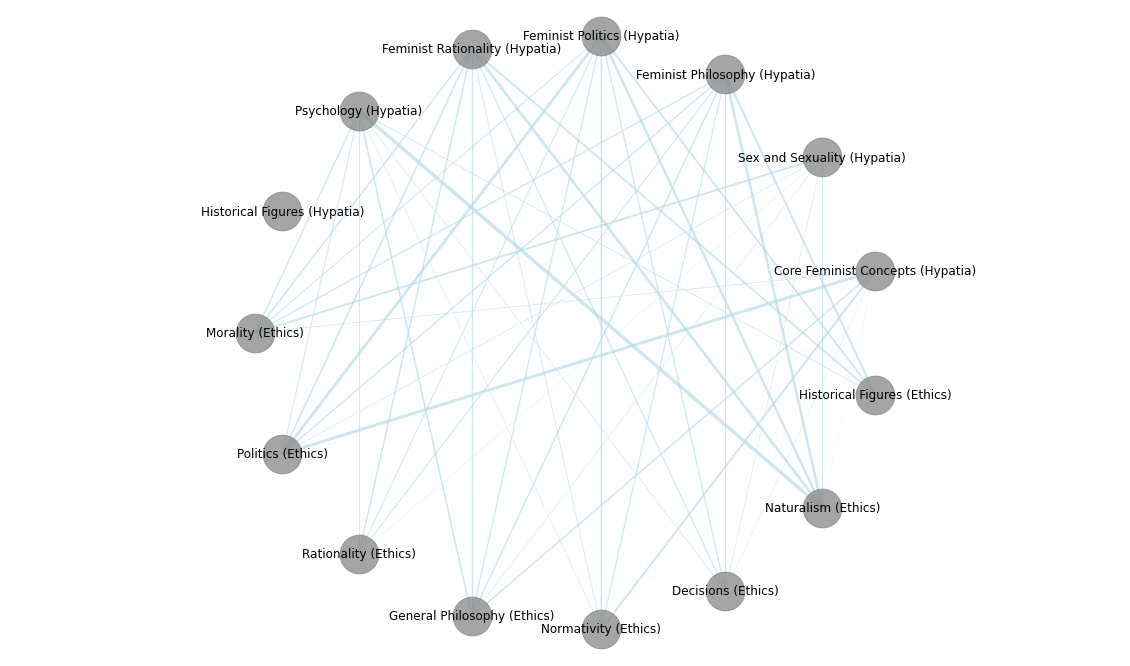

In [7]:
#Create a matrix where each entry is the linkage between an Ethics grouping and a Hypatia grouping.
linkage_matrix=np.zeros((8,7))
for i in range(0,8):
    linkage_matrix[i] = [linkage(ethics_categories[i],hypatia_categories[j]) for j in range(0,7)]

#Create an array with the names of all the categories defined above, for use as labels in a network graph.
ethics_categories_names = ['Morality (Ethics)', 'Politics (Ethics)', 'Rationality (Ethics)', 'General Philosophy (Ethics)', 'Normativity (Ethics)',\
                    'Decisions (Ethics)', 'Naturalism (Ethics)', 'Historical Figures (Ethics)']

hypatia_categories_names = ['Core Feminist Concepts (Hypatia)', 'Sex and Sexuality (Hypatia)', 'Feminist Philosophy (Hypatia)', 'Feminist Politics (Hypatia)',\
                     'Feminist Rationality (Hypatia)', 'Psychology (Hypatia)', 'Historical Figures (Hypatia)']

#Using the Networkx package, create the empty network object.
G = nx.Graph()

#Add nodes from the arrays of category names for both journals.
G.add_nodes_from(ethics_categories_names)
G.add_nodes_from(hypatia_categories_names)

#Add weighted edges between each Ethics node and each Hypatia nodes, where the weights are the squares of the linkages calculated above, 
#these weights will be used to determine the thickness of the edges in the graph. Note that I have squared the linkages so that differences
#in value between the different linkages are more pronounced and visible.
for i in range(0,8):
    for j in range(0,7):
        G.add_weighted_edges_from([(ethics_categories_names[i],hypatia_categories_names[j],(linkage_matrix[i,j])**2)])
        

#Create a graph structure wherein each word category is a node, and the thickness of an edge between nodes corresponds to the 
#value of the linkage between word categories.
widths = nx.get_edge_attributes(G, 'weight')
nodelist = G.nodes()

plt.figure(figsize=(20,12))
pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=1500,
                       node_color='grey',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='lightblue',
                       alpha=0.6)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.margins(x=0.4)
plt.savefig('graph.png')
